In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

#read the file

df = pd.read_csv('NSE-TATAGLOBAL11(1).csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
new_data = df.sort_index(ascending=True, axis=0)


In [ ]:
print(new_data.head)

<bound method NDFrame.head of                  Date    Open  ...  Total Trade Quantity  Turnover (Lacs)
Date                           ...                                       
2013-10-08 2013-10-08  157.00  ...             1720413.0          2688.94
2013-10-09 2013-10-09  155.70  ...             2049580.0          3204.49
2013-10-10 2013-10-10  156.00  ...             3124853.0          4978.80
2013-10-11 2013-10-11  161.15  ...             1880046.0          3030.76
2013-10-14 2013-10-14  160.85  ...             1281419.0          2039.09
...               ...     ...  ...                   ...              ...
2018-10-01 2018-10-01  234.55  ...             1534749.0          3486.05
2018-10-03 2018-10-03  230.00  ...             1708590.0          3960.27
2018-10-04 2018-10-04  223.50  ...             1728786.0          3815.79
2018-10-05 2018-10-05  217.00  ...             3519515.0          7407.06
2018-10-08 2018-10-08  208.00  ...             4642146.0         10062.83

[1235 r

In [ ]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
x_train = train.drop('Date', axis=1)
y_train = train['Close']
print(x_train)
print(y_train)
x_valid = valid.drop('Close', axis=1)
x_valid = valid.drop('Date', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

              Open    High  ...  Total Trade Quantity  Turnover (Lacs)
Date                        ...                                       
2013-10-08  157.00  157.80  ...             1720413.0          2688.94
2013-10-09  155.70  158.20  ...             2049580.0          3204.49
2013-10-10  156.00  160.80  ...             3124853.0          4978.80
2013-10-11  161.15  163.45  ...             1880046.0          3030.76
2013-10-14  160.85  161.45  ...             1281419.0          2039.09
...            ...     ...  ...                   ...              ...
2017-09-29  204.50  209.90  ...             3721338.0          7700.44
2017-10-03  207.25  210.55  ...             1985873.0          4118.57
2017-10-04  207.30  207.70  ...             1964885.0          4032.28
2017-10-05  204.95  210.55  ...             2228532.0          4637.19
2017-10-06  210.00  212.25  ...             2534607.0          5332.72

[987 rows x 7 columns]
Date
2013-10-08    155.80
2013-10-09    155.55
2013-1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
print(np.array(preds))
print(np.array(y_valid))
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

[208.3  208.45 209.4  212.   210.25 209.6  210.3  206.8  204.6  203.1
 209.65 205.3  209.8  220.5  226.8  226.95 227.8  226.35 225.3  234.7
 225.   224.5  240.45 236.15 234.4  246.7  250.9  251.95 259.9  274.9
 273.15 274.05 274.8  278.7  277.45 287.75 280.2  287.1  283.55 279.05
 279.95 274.95 284.   288.45 298.35 287.8  284.45 284.3  286.85 290.85
 300.65 300.85 300.15 302.75 305.95 305.55 306.6  316.4  312.9  311.15
 311.2  312.25 312.95 317.6  315.3  314.1  313.3  325.75 323.   316.4
 313.55 305.45 308.35 308.85 307.2  304.25 304.25 301.8  304.   290.65
 288.35 274.85 273.1  266.7  280.15 280.45 278.25 285.1  281.95 279.05
 275.6  267.95 262.85 266.6  262.15 270.7  273.5  275.   275.5  274.85
 275.65 274.15 268.9  273.4  268.35 276.05 278.2  278.5  279.6  272.4
 260.6  262.05 263.2  258.85 257.9  262.2  263.8  258.75 276.95 274.8
 270.25 273.   272.7  277.8  275.5  273.85 273.85 275.5  279.65 280.95
 284.1  286.2  286.3  283.6  283.15 289.1  291.2  292.1  297.55 292.75
 286.65 287.

4.2558806364103905e-12

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


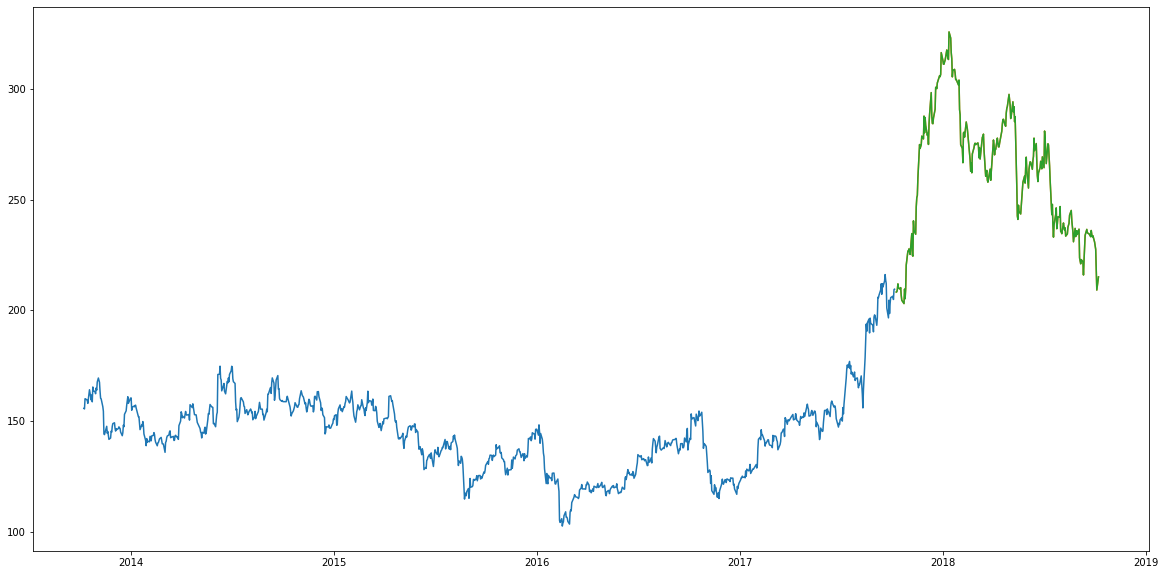

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

## From Scratch Linear Regression (with and without parallelization)

In [ ]:
x_train_standardized = (x_train - x_train .mean()) / x_train.std()
#x_train_standardized = x_train
x_valid_standardized  = (x_valid - x_train.mean()) /  x_train.std()
#x_valid_standardized  = x_valid

## Serial Code

In [ ]:
import time
from numba import config, njit, set_num_threads, prange
# Setting the OPENMP threading layer
config.THREADING_LAYER = 'omp'
set_num_threads(2)

def error_function(y_actual,y_predicted):
    error = 0
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)

def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    no_of_columns = x_train.shape[1]
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    new_x_train[:,0:no_of_columns] = x_train
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05                                # Learning rate Decay 
    return w

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)

In [ ]:
start = time.time()
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(x_train_standardized,y_train,num_iterations,learning_rate)
Y_pred = regression_test(x_valid_standardized,w)
error_function(y_valid,Y_pred)
end = time.time()
print("Time taken = ",(end-start)*1000, "milliseconds")

mean square error:  10.917041540020264 after 0 th iteration
mean square error:  0.18715128510453707 after 1 th iteration
mean square error:  0.014222020766939987 after 2 th iteration
mean square error:  0.003435157708342316 after 3 th iteration
mean square error:  0.0015054306608476798 after 4 th iteration
mean square error:  0.0008587035656410612 after 5 th iteration
mean square error:  0.00055564247030085 after 6 th iteration
mean square error:  0.0003848587295699363 after 7 th iteration
mean square error:  0.00027748660072172596 after 8 th iteration
mean square error:  0.00020515909905160056 after 9 th iteration
mean square error:  0.00015417937778626915 after 10 th iteration
mean square error:  0.00011712562990249674 after 11 th iteration
mean square error:  8.961069122418467e-05 after 12 th iteration
mean square error:  6.886353952289753e-05 after 13 th iteration
mean square error:  5.3043595312630016e-05 after 14 th iteration
mean square error:  4.0880788816441076e-05 after 15 th

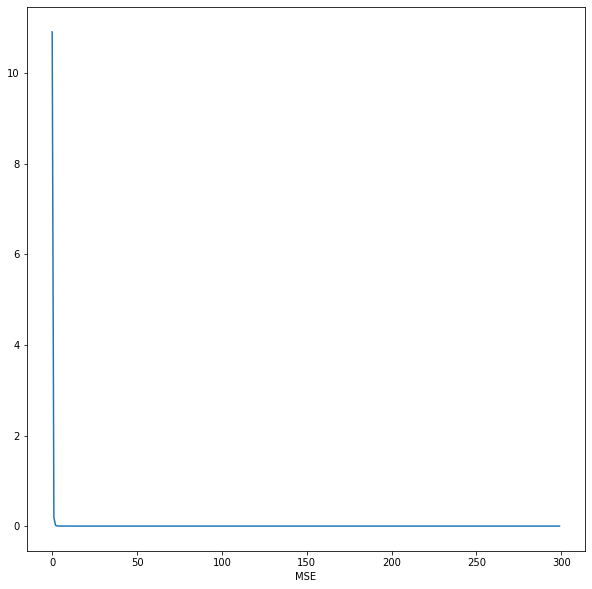

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.plot(range(0,300 ), MSE_points)
plt.xlabel('MSE')
plt.show()
# sns.lineplot(MSE_points)

In [ ]:
pred_df = pd.DataFrame(
    {
        'Actual Value' : y_valid, 
     'Predicted Values' : Y_pred,
    }
)
pred_df.head(10)

,Actual Value,Predicted Values
Date,,
2017-10-09,208.30,207.905216
2017-10-10,208.45,208.066213
2017-10-11,209.40,210.385804
2017-10-12,212.00,210.680733
2017-10-13,210.25,210.216688
2017-10-16,209.60,208.794750
2017-10-17,210.30,210.048003
2017-10-18,206.80,208.259443
2017-10-19,204.60,204.174258


### With serial: 
Time taken =  13284.950256347656 milliseconds
